## Behavioral Cloning Visualization - P3 

Some visualizations to take a look at the data before training

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc
import pandas as pd
import collections
%matplotlib inline
import math
import csv
import cv2
import os.path

print('Modules Imported!!')

Modules Imported!!


In [16]:
# Load Data:

print('Reading from data folder the driving log.')
columns = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']

file_path = './data/driving_log.csv'
driving_data = pd.read_csv(file_path, names=columns)[1:]

print('Columns : ', columns)
print('Data Loaded!!')

Reading from data folder the driving log.
Columns :  ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
Data Loaded!!


In [17]:
# Visualize Data
driving_data.iloc[:10]

,center,left,right,steering,throttle,brake,speed
1,IMG/center_2017_02_24_10_41_02_086.jpg,IMG/left_2017_02_24_10_41_02_086.jpg,IMG/right_2017_02_24_10_41_02_086.jpg,0,0,0,5.528913E-07
2,IMG/center_2017_02_24_10_41_02_170.jpg,IMG/left_2017_02_24_10_41_02_170.jpg,IMG/right_2017_02_24_10_41_02_170.jpg,0,0,0,4.365755E-06
3,IMG/center_2017_02_24_10_41_02_237.jpg,IMG/left_2017_02_24_10_41_02_237.jpg,IMG/right_2017_02_24_10_41_02_237.jpg,0,0,0,2.305866E-06
4,IMG/center_2017_02_24_10_41_02_324.jpg,IMG/left_2017_02_24_10_41_02_324.jpg,IMG/right_2017_02_24_10_41_02_324.jpg,0,0,0,4.865718E-06
5,IMG/center_2017_02_24_10_41_02_406.jpg,IMG/left_2017_02_24_10_41_02_406.jpg,IMG/right_2017_02_24_10_41_02_406.jpg,0,0,0,2.507624E-06
6,IMG/center_2017_02_24_10_41_02_477.jpg,IMG/left_2017_02_24_10_41_02_477.jpg,IMG/right_2017_02_24_10_41_02_477.jpg,0,0,0,5.198409E-06
7,IMG/center_2017_02_24_10_41_02_562.jpg,IMG/left_2017_02_24_10_41_02_562.jpg,IMG/right_2017_02_24_10_41_02_562.jpg,0,0,0,2.131163E-06
8,IMG/center_2017_02_24_10_41_02_643.jpg,IMG/left_2017_02_24_10_41_02_643.jpg,IMG/right_2017_02_24_10_41_02_643.jpg,0,0,0,1.740322E-06
9,IMG/center_2017_02_24_10_41_02_727.jpg,IMG/left_2017_02_24_10_41_02_727.jpg,IMG/right_2017_02_24_10_41_02_727.jpg,0,0,0,8.014759E-06
10,IMG/center_2017_02_24_10_41_02_814.jpg,IMG/left_2017_02_24_10_41_02_814.jpg,IMG/right_2017_02_24_10_41_02_814.jpg,0,0,0,3.702764E-07


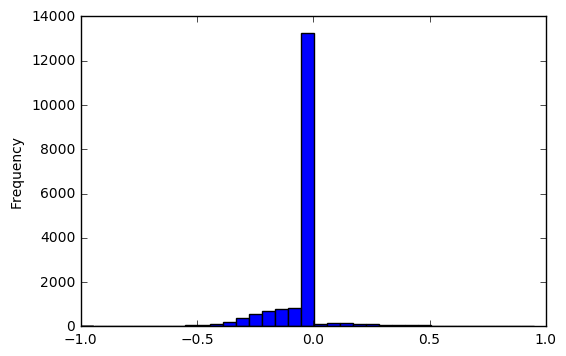

In [18]:
# Visualize Steering data .. there seems to be a lot of zeros .. Thanks to Vivek, Annie Flippo, and Nick Hortovanyi for 
# showing me ideas on to visualize this part ..

driving_data['steering']=driving_data['steering'].astype(float)
driving_data['steering'].plot.hist(bins=35)

In [19]:
# In Nick's blog post, he also used some explanation tools to get more information about the data:
driving_data['steering'].describe()

count    18008.000000
mean        -0.034279
std          0.127632
min         -1.000000
25%         -0.004223
50%          0.000000
75%          0.000000
max          0.950000
Name: steering, dtype: float64

It seems from the description and diagram above that our data is somehow learning towards a right biased , am tempted to say
almost normal distriction. However it seems that we have some negative steering values. Not sure what that means? /

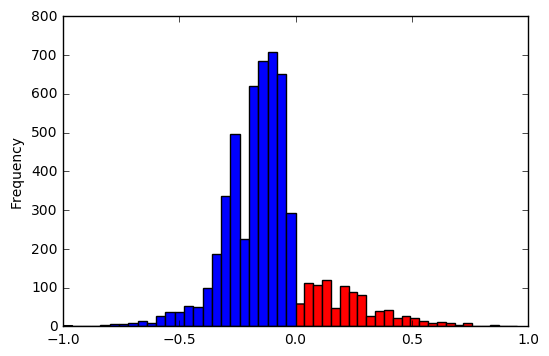

In [20]:
# from nicks work too, it seems pandas lets us query the values .. pretty cool !!!
driving_data.query('steering > 0')['steering'].plot.hist(bins=25, color='red')

driving_data.query('steering < 0')['steering'].plot.hist(bins=25, color='blue')

So considerable amount of data with negative steering. Now lets get some data on the speed shall we:

In [21]:
driving_data['speed']=driving_data['speed'].astype(float)
driving_data['speed'].describe()

count    1.800800e+04
mean     2.946932e+01
std      2.543611e+00
min      3.702764e-07
25%      3.018004e+01
50%      3.019002e+01
75%      3.019029e+01
max      3.075249e+01
Name: speed, dtype: float64

Seems we had an average speed of 28 miles per hour (assuming those are the units).

(33, 100, 3)

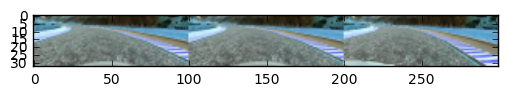

In [22]:
# Now lets visualize images and see what can we do with them

right_image = mpimg.imread('./data/'+driving_data['right'][1].strip())
right_image_copy = np.copy(right_image)
right_image = cv2.cvtColor(right_image_copy, cv2.COLOR_BGR2RGB)

center_image = mpimg.imread('./data/'+driving_data['center'][1].strip())
center_image_copy = np.copy(center_image)
center_image = cv2.cvtColor(center_image_copy, cv2.COLOR_BGR2RGB)


left_image = mpimg.imread('./data/'+driving_data['center'][1].strip())
left_image_copy = np.copy(left_image)
left_image = cv2.cvtColor(left_image_copy, cv2.COLOR_BGR2RGB)

pad=np.zeros((160,10,3), np.uint8)

plt.imshow(np.hstack((left_image, pad, center_image, pad, right_image)))

# Now inspired by Vivek , and Annie, lets try and crop the image to get rid of where the car is
left_image = left_image[math.floor(left_image.shape[0]/4):left_image.shape[0]-13, 0:left_image.shape[1]]
ratio = 100.0 / left_image.shape[1]
dim = (100, int(left_image.shape[0] * ratio))
left_image = cv2.resize(left_image, dim, interpolation=cv2.INTER_AREA)

center_image = center_image[math.floor(center_image.shape[0]/4):center_image.shape[0]-13, 0:center_image.shape[1]]
ratio = 100.0 / center_image.shape[1]
dim = (100, int(center_image.shape[0] * ratio))
center_image = cv2.resize(center_image, dim, interpolation=cv2.INTER_AREA)

right_image = right_image[math.floor(right_image.shape[0]/4):right_image.shape[0]-13, 0:right_image.shape[1]]
ratio = 100.0 / right_image.shape[1]
dim = (100, int(right_image.shape[0] * ratio))
right_image = cv2.resize(right_image, dim, interpolation=cv2.INTER_AREA)

plt.imshow(np.hstack((left_image, center_image, right_image)))

center_image.shape

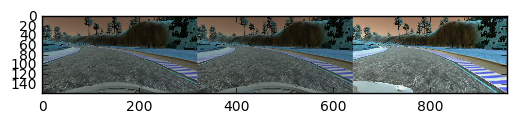

In [23]:
# With brightness 
import random

def random_brightness(image):
    change_pct = random.uniform(0.5, 1.5)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:, :, 2] = hsv[:, :, 2] * change_pct
    img_brightness = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return img_brightness


right_image = mpimg.imread('./data/'+driving_data['right'][1].strip())
right_image_copy = np.copy(right_image)
right_image = cv2.cvtColor(right_image_copy, cv2.COLOR_BGR2RGB)
right_image = random_brightness(right_image)

center_image = mpimg.imread('./data/'+driving_data['center'][1].strip())
center_image_copy = np.copy(center_image)
center_image = cv2.cvtColor(center_image_copy, cv2.COLOR_BGR2RGB)
center_image = random_brightness(center_image)


left_image = mpimg.imread('./data/'+driving_data['center'][1].strip())
left_image_copy = np.copy(left_image)
left_image = cv2.cvtColor(left_image_copy, cv2.COLOR_BGR2RGB)
left_image = random_brightness(left_image)
plt.imshow(np.hstack((left_image, center_image, right_image)))

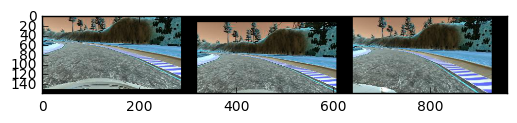

In [24]:
# Also transposed images to change the rotation of the image:
def translate(image, x_translate):
    y_translate = (35*np.random.uniform()) - (35/2)
    translate_matrix = np.float32([[1, 0, x_translate], [0, 1, y_translate]])
    return cv2.warpAffine(image, translate_matrix, (image.shape[1], image.shape[0]))

x_translate = (100 * np.random.uniform()) - (100 / 2)

right_image = mpimg.imread('./data/'+driving_data['right'][1].strip())
right_image_copy = np.copy(right_image)
right_image = cv2.cvtColor(right_image_copy, cv2.COLOR_BGR2RGB)
right_image = translate(right_image, x_translate)

center_image = mpimg.imread('./data/'+driving_data['center'][1].strip())
center_image_copy = np.copy(center_image)
center_image = cv2.cvtColor(center_image_copy, cv2.COLOR_BGR2RGB)
center_image = translate(center_image, x_translate)


left_image = mpimg.imread('./data/'+driving_data['center'][1].strip())
left_image_copy = np.copy(left_image)
left_image = cv2.cvtColor(left_image_copy, cv2.COLOR_BGR2RGB)
left_image = translate(left_image, x_translate)

plt.imshow(np.hstack((left_image, center_image, right_image)))

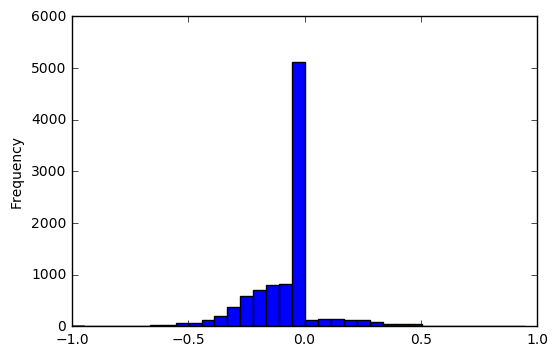

In [25]:
# Read in CSV file
csv_loc = "data/driving_log.csv"
driving_data = pd.read_csv(csv_loc)

# Drop 65% of Steering Angles with value = 0
driving_data = driving_data.drop(driving_data[driving_data['steering'] == 0].sample(frac=0.65).index)
driving_data['steering']=driving_data['steering'].astype(float)
driving_data['steering'].plot.hist(bins=35)

As we can see from the distribution above, the data looks much better